## Starting Importing all the necessary packages for the analysis  

In [2]:
import numpy as np
import pandas as pd
import os
import openpyxl
# import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'white'
# import matplotlib.ticker as tck
%matplotlib inline


## Set path for input folder

In [3]:
input_folder= 'F:\One Drive\OneDrive - Indian Institute of Science Education and Research Bhopal\Excel data for Various Parameters\Reach Wise Divison\Bar Area\Plot'

## Set path for output folder

In [4]:
output_folder = 'F:\One Drive\OneDrive - Indian Institute of Science Education and Research Bhopal\Excel data for Various Parameters\Reach Wise Divison\Bar Area\Plot'


### Create empty dataset frame to hold the concatenated data

In [5]:
#Read the excel file
# Load the xlsx file
excel_data = pd.read_excel('Area-Final.xlsx')
excel_data.head()

,Reach,1965,Mon-2016,Mon-2017,Mon-2018,Mon-2019,Mon-2020,Post-2016,Post-2017,Post-2018,Post-2019,Post-2020,Pre-2017,Pre-2018,Pre-2019,Pre-2020
0,R1,2.389718e+06,2.105330e+06,2.427060e+05,6.873741e+05,772243.506502,1.129871e+06,7.673697e+05,7.584771e+05,8.143766e+05,1.072738e+06,1.121288e+06,9.498950e+05,9.221431e+05,1.590409e+06,1.381907e+06
1,R2,4.264422e+06,1.377189e+06,7.319752e+05,5.994306e+05,433777.804396,8.395830e+05,1.194451e+06,2.425089e+06,1.943507e+06,3.033881e+06,1.957260e+06,2.407929e+06,2.705970e+06,2.530700e+06,1.360239e+06
2,R3,1.250186e+07,5.135236e+06,2.214288e+06,1.053803e+06,909816.109447,1.275043e+06,9.664288e+05,1.687332e+06,1.554458e+06,2.246687e+06,1.549986e+06,2.609110e+06,2.056715e+06,1.665469e+06,2.940388e+06
3,R4,1.274461e+07,2.022490e+06,5.038544e+05,6.091548e+05,459197.885912,9.101474e+05,4.078048e+05,1.539638e+06,7.382482e+05,1.522374e+06,1.122289e+06,1.569435e+06,1.712043e+06,1.633914e+05,1.854145e+06
4,R5,9.545781e+06,2.178985e+06,0.000000e+00,6.584605e+05,779412.318511,8.607034e+05,5.842984e+05,4.020952e+05,1.049668e+06,2.480389e+06,6.661298e+05,6.530527e+05,4.314648e+05,4.674855e+05,2.421888e+06


In [6]:
sqm_to_sqkm = excel_data.iloc[:,1:]/1000000
print(sqm_to_sqkm)

        1965  Mon-2016  Mon-2017  Mon-2018  Mon-2019  Mon-2020  Post-2016  \
0   2.389718  2.105330  0.242706  0.687374  0.772244  1.129871   0.767370   
1   4.264422  1.377189  0.731975  0.599431  0.433778  0.839583   1.194451   
2  12.501862  5.135236  2.214288  1.053803  0.909816  1.275043   0.966429   
3  12.744610  2.022490  0.503854  0.609155  0.459198  0.910147   0.407805   
4   9.545781  2.178985  0.000000  0.658461  0.779412  0.860703   0.584298   
5   6.773545  2.888128  0.000000  0.375939  1.148950  1.362449   0.806167   
6   3.511914  0.148116  0.000000  0.072919  0.077716  0.858327   0.869900   
7   7.472836  0.232027  0.000000  0.000000  0.265059  0.357828   0.511245   
8   1.789813  0.162735  0.000000  0.044036  0.220856  0.551261   0.627013   

   Post-2017  Post-2018  Post-2019  Post-2020  Pre-2017  Pre-2018  Pre-2019  \
0   0.758477   0.814377   1.072738   1.121288  0.949895  0.922143  1.590409   
1   2.425089   1.943507   3.033881   1.957260  2.407929  2.705970  2.53

In [7]:
# Add a new column containing a serial number
sqm_to_sqkm.insert(loc=0, column="Reach", value=range(1, len(sqm_to_sqkm)+1))
print(sqm_to_sqkm)


   Reach       1965  Mon-2016  Mon-2017  Mon-2018  Mon-2019  Mon-2020  \
0      1   2.389718  2.105330  0.242706  0.687374  0.772244  1.129871   
1      2   4.264422  1.377189  0.731975  0.599431  0.433778  0.839583   
2      3  12.501862  5.135236  2.214288  1.053803  0.909816  1.275043   
3      4  12.744610  2.022490  0.503854  0.609155  0.459198  0.910147   
4      5   9.545781  2.178985  0.000000  0.658461  0.779412  0.860703   
5      6   6.773545  2.888128  0.000000  0.375939  1.148950  1.362449   
6      7   3.511914  0.148116  0.000000  0.072919  0.077716  0.858327   
7      8   7.472836  0.232027  0.000000  0.000000  0.265059  0.357828   
8      9   1.789813  0.162735  0.000000  0.044036  0.220856  0.551261   

   Post-2016  Post-2017  Post-2018  Post-2019  Post-2020  Pre-2017  Pre-2018  \
0   0.767370   0.758477   0.814377   1.072738   1.121288  0.949895  0.922143   
1   1.194451   2.425089   1.943507   3.033881   1.957260  2.407929  2.705970   
2   0.966429   1.687332   1.5

In [8]:
#Save the excel file
output_file_path = os.path.join(
    output_folder, "Area-Final-Updated.csv")
sqm_to_sqkm.to_csv('Area-Final-Updated.csv', index=False)


In [9]:
Plot = pd.read_csv('Area-Final-Updated.csv')
Plot

,Reach,1965,Mon-2016,Mon-2017,Mon-2018,Mon-2019,Mon-2020,Post-2016,Post-2017,Post-2018,Post-2019,Post-2020,Pre-2017,Pre-2018,Pre-2019,Pre-2020
0,1,2.389718,2.105330,0.242706,0.687374,0.772244,1.129871,0.767370,0.758477,0.814377,1.072738,1.121288,0.949895,0.922143,1.590409,1.381907
1,2,4.264422,1.377189,0.731975,0.599431,0.433778,0.839583,1.194451,2.425089,1.943507,3.033881,1.957260,2.407929,2.705970,2.530700,1.360239
2,3,12.501862,5.135236,2.214288,1.053803,0.909816,1.275043,0.966429,1.687332,1.554458,2.246687,1.549986,2.609110,2.056715,1.665469,2.940388
3,4,12.744610,2.022490,0.503854,0.609155,0.459198,0.910147,0.407805,1.539638,0.738248,1.522374,1.122289,1.569435,1.712043,0.163391,1.854145
4,5,9.545781,2.178985,0.000000,0.658461,0.779412,0.860703,0.584298,0.402095,1.049668,2.480389,0.666130,0.653053,0.431465,0.467486,2.421888
5,6,6.773545,2.888128,0.000000,0.375939,1.148950,1.362449,0.806167,0.579837,2.068554,3.879709,1.269956,1.198395,0.916870,1.328412,1.456206
6,7,3.511914,0.148116,0.000000,0.072919,0.077716,0.858327,0.869900,0.360684,0.855389,0.763757,0.337419,0.736205,1.567900,1.550698,0.823801
7,8,7.472836,0.232027,0.000000,0.000000,0.265059,0.357828,0.511245,0.489572,0.411655,0.970576,0.270791,1.381437,1.784828,0.032285,0.300670
8,9,1.789813,0.162735,0.000000,0.044036,0.220856,0.551261,0.627013,0.381375,0.757391,0.505132,0.423116,0.675657,1.186579,0.022641,0.158412


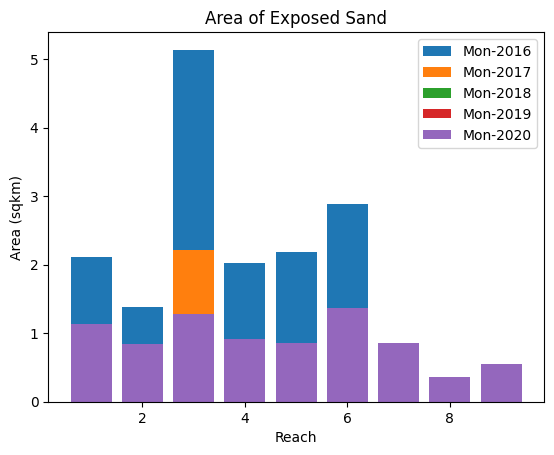

In [10]:
'''
This is the sqm_to_sqkm of the exposed sand areas for the various reaches of the river Yamuna for the years 1965 vs Monsooon 2016-2020
'''
plt.bar(sqm_to_sqkm['Reach'], sqm_to_sqkm['Mon-2016'], label='Mon-2016')
plt.bar(sqm_to_sqkm['Reach'], sqm_to_sqkm['Mon-2017'], label='Mon-2017')
plt.bar(sqm_to_sqkm['Reach'], sqm_to_sqkm['Mon-2018'], label='Mon-2018')
plt.bar(sqm_to_sqkm['Reach'], sqm_to_sqkm['Mon-2019'], label='Mon-2019')
plt.bar(sqm_to_sqkm['Reach'], sqm_to_sqkm['Mon-2020'], label='Mon-2020')
plt.title("Area of Exposed Sand")

plt.xlabel("Reach")
plt.ylabel("Area (sqkm)")
plt.legend()
plt.show()